#Introduction to Python Imaging Library(PIL)

### EXERCISE 1

1. Read and display the image.

• Read the image using the Pillow library and display it.

• You can also use matplotlib to display the image.


In [3]:
!pip install pillow
from PIL import Image
import matplotlib.pyplot as plt

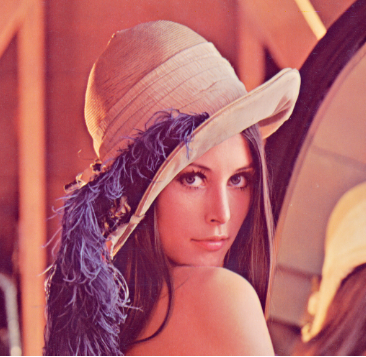

In [4]:
#displaying image using pil
image_colored = Image.open("/content/drive/MyDrive/6CS012 - Artificial Intelligence and Machine Learning/Week 1/lenna_image.png")
display(image_colored)

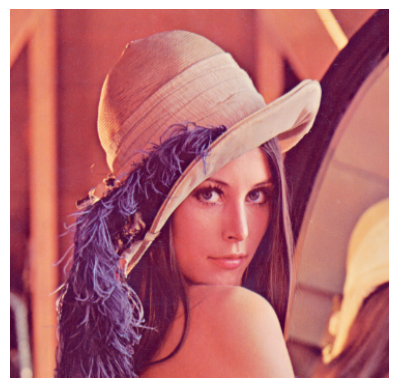

In [5]:
#displaying image using matplotlib
import matplotlib.image as mpimg

#load the image
image = mpimg.imread("/content/drive/MyDrive/6CS012 - Artificial Intelligence and Machine Learning/Week 1/lenna_image.png")

#display the image
plt.imshow(image)
plt.axis('off')
plt.show()

2. Display only the top left corner of 100x100 pixels.

• Extract the top-left corner of the image (100x100 pixels) and display it using NumPy and
Array Indexing.


In [6]:
import numpy as np

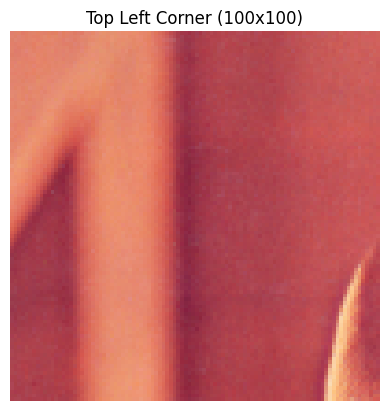

In [13]:
#load the image using Pillow
image = Image.open("/content/drive/MyDrive/6CS012 - Artificial Intelligence and Machine Learning/Week 1/lenna_image.png")

#define the crop area (Top-left 100x100 pixels)
left = 0
upper = 0
right = 100
lower = 100
cropped_image = image.crop((left, upper, right, lower))

#convert new image into array
new_image = np.array(cropped_image)

#display the image
plt.imshow(new_image)
plt.title('Top Left Corner (100x100)')
plt.axis('off')
plt.show()

3. Show the three color channels (R, G, B).

• Separate the image into its three color channels (Red, Green, and Blue) and display them
individually, labeling each channel as R, G, and B.{Using NumPy.}


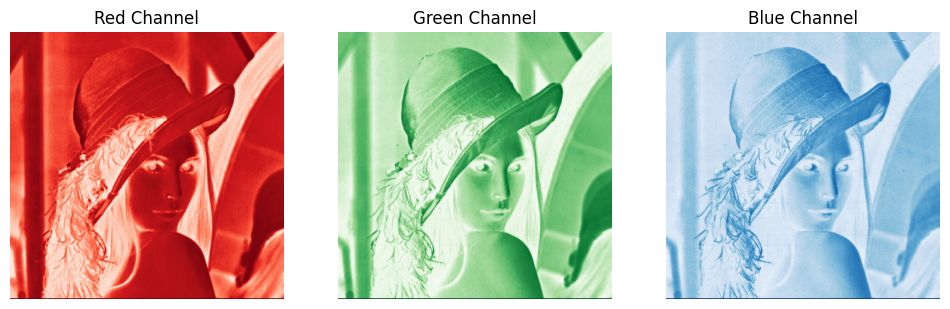

In [12]:
#convert the image to a NumPy array
image_array = np.array(image)

#separate the color channels
red_channel = image_array[:, :, 0]
green_channel = image_array[:, :, 1]
blue_channel = image_array[:, :, 2]

#display the color channels
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(red_channel, cmap='Reds')
plt.title('Red Channel')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(green_channel, cmap='Greens')
plt.title('Green Channel')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(blue_channel, cmap='Blues')
plt.title('Blue Channel')
plt.axis('off')

plt.show()

4. Modify the top 100 × 100 pixels to a value of 210 and display the resulting image:

• Modify the pixel values of the top-left 100 × 100 region to have a value of 210 (which is a light gray color), and then display the modified image.

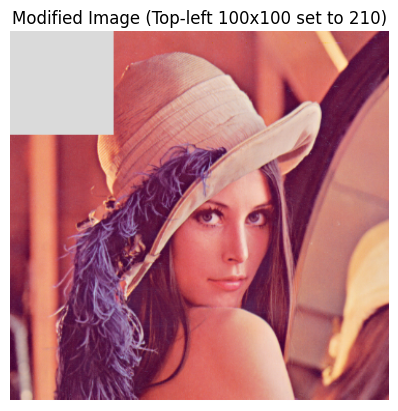

In [14]:
#modify the top-left 100×100 pixels
image_array[:100, :100] = 210  # Sets the region to a light gray color

#convert back to an image
modified_image = Image.fromarray(image_array)

#display the modified image
plt.imshow(modified_image, cmap="gray")  #display in grayscale
plt.axis("off")
plt.title("Modified Image (Top-left 100x100 set to 210)")
plt.show()

### EXERCISE 2

1. Load and display a grayscale image.

• Load a grayscale image using the Pillow library.

• Display the grayscale image using matplotlib.

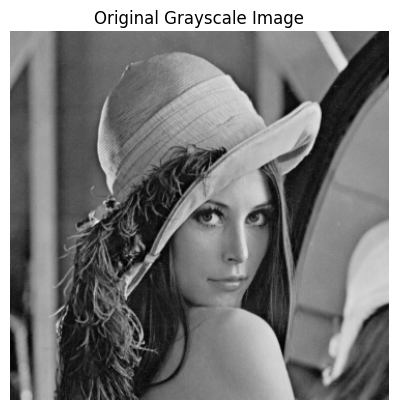

In [25]:
#convert image to grayscale
image_grayed = image.convert("L")
image_array = np.array(image_grayed)

#display the image using matplotlib
plt.imshow(image_array, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')
plt.show()


2. Extract and display the middle section of the image (150 pixels).

• Extract a 150 pixel section from the center of the image using NumPy array slicing.

• Display this cropped image using matplotlib.

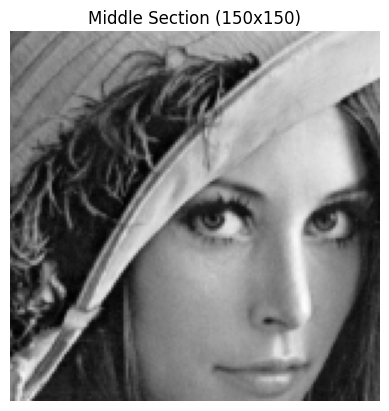

In [20]:
#convert the grayscale image into array
image_array = np.array(image_grayed)

#get image dimensions
h, w = image_array.shape[:2]

#extract the center 150x150 region
half = 75  #half of 150
middle_section = image_array[h//2 - half : h//2 + half, w//2 - half : w//2 + half]

#display the middle section
plt.imshow(middle_section, cmap='gray')
plt.axis('off')
plt.title('Middle Section (150x150)')
plt.show()

3. Apply a simple threshold to the image (e.g., set all pixel values below 100 to 0).

• Apply a threshold to the grayscale image: set all pixel values below 100 to 0, and all values above 100 to 255 (creating a binary image).

• Display the resulting binary image.


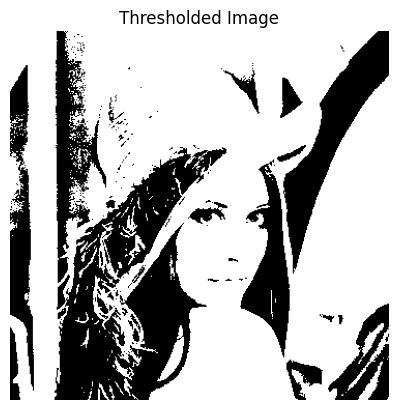

In [22]:
#apply a threshold to the grayscale image
threshold = 100
binary_image = np.where(image_array < threshold, 0, 255)

#dispaly binary image
plt.imshow(binary_image, cmap='gray')
plt.axis('off')
plt.title('Thresholded Image')
plt.show()

4. Rotate the image 90 degrees clockwise and display the result.

• Rotate the image by 90 degrees clockwise using the Pillow rotate method or by manipulating the image array.

• Display the rotated image using matplotlib.


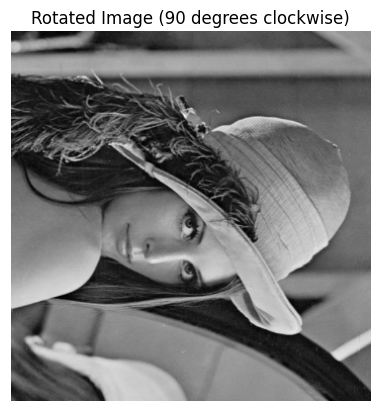

In [26]:
#rotate the image 90 degrees clockwise using Pillow rotate method
rotated_image = image_grayed.rotate(-90, expand=True)

#convert the image to array
new_image = np.array(rotated_image)

#display the rotated image
plt.imshow(new_image, cmap='gray')
plt.axis('off')
plt.title('Rotated Image (90 degrees clockwise)')
plt.show()

5. Convert the grayscale image to an RGB image.

• Convert the grayscale image into an RGB image where the grayscale values are replicated across all three channels (R, G, and B).

• Display the converted RGB image using matplotlib.

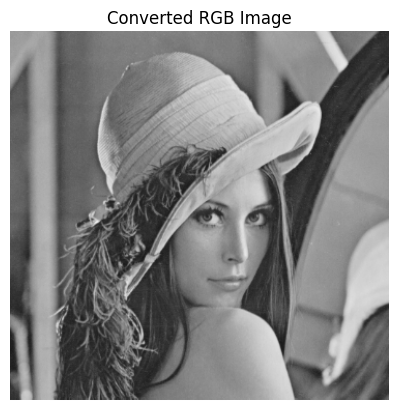

In [27]:
#convert the grayscale image into array
image_grayed_array = np.array(image_grayed)

#stack grayscal value across RGB
rgb_image_array = np.stack([image_grayed_array]*3, axis = -1)

plt.imshow(rgb_image_array)
plt.axis('off')
plt.title("Converted RGB Image")
plt.show()

# Image Compression and Decompression using PCA.

1. Load and Prepare Data:

• Fetch an image of you choice.{If colour convert to grayscale}

• Center the dataset - Standaridze the Data.

• Calculate the covaraince matrix of the Standaridze data.

In [30]:
#center the data (standardize)
image_mean = np.mean(image_grayed, axis=0)

#subtract mean to center the data
image_centered = image_grayed - image_mean

#calculate the covariance matrix
covariance_matrix = np.cov(image_centered, rowvar=False)

print("Covariance Matrix:")
covariance_matrix.shape

Covariance Matrix:


(366, 366)

2. Eigen Decomposition and Identifying Principal Components:

• Compute Eigen Values and Eigen Vectors.

• Sort the eigenvalues in descending order and choose the top k eigenvectors corresponding to
the highest eigenvalues.

• Identify the Principal Components with the help of cumulative Sum plot.


In [31]:
#Compute Eigen Values and Eigen Vectors
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

In [32]:
#Sort eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


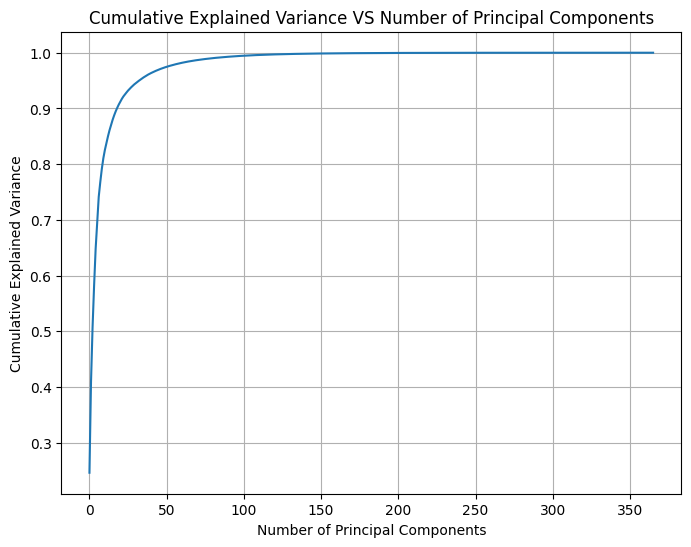

In [49]:
#Identify Principal Components using cumulative sum plot
cumulative_variance_ratio = eigenvalues/np.sum(eigenvalues)

plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(cumulative_variance_ratio))
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Explained Variance VS Number of Principal Components")
plt.grid(True)
plt.show()

In [35]:
k = 10 #choose k principal components (important features)
components = eigenvectors[:,:k]
print(f'The top {k} principal components are: \n {components}')

The top 10 principal components are: 
 [[ 0.03799681+0.j  0.02538784+0.j -0.03063453+0.j ...  0.04378869+0.j
   0.08302151+0.j  0.02403511+0.j]
 [ 0.03775231+0.j  0.01998008+0.j -0.02721542+0.j ...  0.04948255+0.j
   0.08830653+0.j  0.01874472+0.j]
 [ 0.03732459+0.j  0.01674697+0.j -0.02483129+0.j ...  0.05583981+0.j
   0.08714484+0.j  0.01573028+0.j]
 ...
 [-0.07310773+0.j  0.11655761+0.j  0.03536413+0.j ... -0.08769972+0.j
  -0.05559036+0.j -0.00164523+0.j]
 [-0.07142208+0.j  0.11717245+0.j  0.03260312+0.j ... -0.08436535+0.j
  -0.05108559+0.j  0.00062866+0.j]
 [-0.06948332+0.j  0.11869273+0.j  0.03031648+0.j ... -0.07829314+0.j
  -0.04565617+0.j  0.00453448+0.j]]


3. Reconstruction and Experiment:

• Reconstruction: Transform the original data by multiplying it with the selected eigenvectors(PCs) to obtain a lower-dimensional representation.

• Experiments: Pick Four different combination of principal components with various explained variance value and compare the result.

• Display the Results and Evaluate.

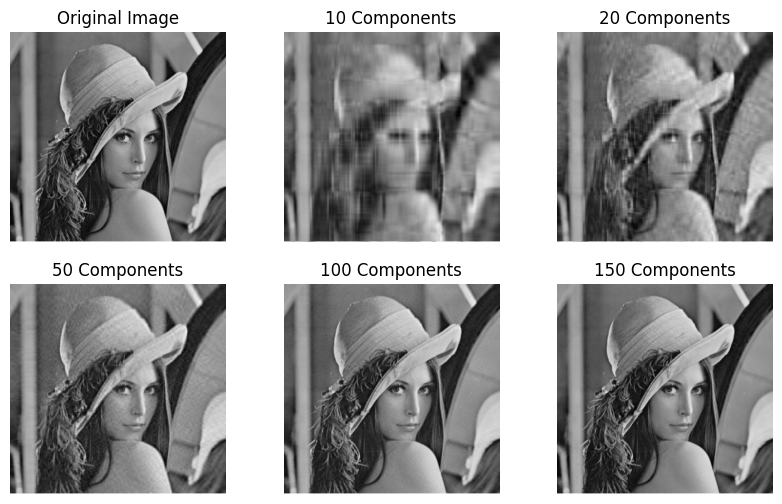

In [48]:
#Reconstruction:
#function to compress & reconstruct image
def reconstruct_image(k):
    components = eigenvectors[:, :k].real  #top k eigenvectors
    compressed_data = np.dot(image_centered, components)  #lower dimension
    decompressed_data = np.dot(compressed_data, components.T)+ image_mean #reconstruct image
    return np.clip(decompressed_data, 0, 255)  #make sure pixel values remain valid

#Experiments:
#experiment with different values
k_values = [10, 20, 50, 100, 150]

fig, axes = plt.subplots(2, 3, figsize=(10, 6))
axes = axes.flatten()  #convert 2D array to 1D for easier indexing

#original image
axes[0].imshow(image_array, cmap="gray")
axes[0].set_title("Original Image")
axes[0].axis("off")

#compressed images
for i, k in enumerate(k_values):
    reconstructed = reconstruct_image(k)
    axes[i + 1].imshow(reconstructed, cmap="gray")
    axes[i + 1].set_title(f"{k} Components")
    axes[i + 1].axis("off")

plt.show()